In [92]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import statistics
import plotly.offline as offline
from plotly.subplots import make_subplots
import plotly.express as px
offline.init_notebook_mode(connected = True)

%matplotlib inline 

In [109]:
df_1 = pd.read_csv('df_1000_samples_rank_avg_0_new.csv')
df_2 = pd.read_csv('df_1000_samples_rank_avg_1_new.csv')
df_3 = pd.read_csv('df_1000_samples_rank_avg_2_new.csv')
df_4 = pd.read_csv('df_1000_samples_rank_avg_3_new.csv')
df_5 = pd.read_csv('df_1000_samples_rank_avg_4_new.csv')
df_6 = pd.read_csv('df_1000_samples_rank_avg_5_new.csv')
# df_4 = pd.read_csv('df_1000_samples_rank_avg_4.csv')
# df_5 = pd.read_csv('df_1000_samples_rank_avg_5.csv')

df_all = [df_1, df_2, df_3, df_4, df_5]

In [110]:
all_cols = df_1.columns.values
all_cols_name = ['non_sig_ratio','Noise','Informative features (%)', 'Number of Features',
                 'RF MAE', 'GBT MAE', 'DNN MAE', 'RF PI', 'GBT PI', 'DNN PI', 'RF SHAP', 'GBT SHAP', ' DNN SHAP',
                 'DNN IG', 'Mean', 'Median', 'Mode', 'Box-Whiskers', 'Tau test', 'Majority vote', 'Kendall Tau', 
                 'Spearman Rho']

# Model’s Error vs Feature Importance Error

In [111]:
all_rf_mae_median = list()
all_rf_mae_std = list()

all_gb_mae_median = list()
all_gb_mae_std = list()

all_dnn_mae_median = list()
all_dnn_mae_std = list()

all_err_rf_pi_median = list()
all_err_rf_pi_std = list()

all_err_gb_pi_median = list()
all_err_gb_pi_std = list()

all_err_dnn_pi_median = list()
all_err_dnn_pi_std = list()

all_err_rf_sv_median = list()
all_err_rf_sv_std = list()

all_err_gb_sv_median = list()
all_err_gb_sv_std = list()

all_err_dnn_sv_median = list()
all_err_dnn_sv_std = list()

all_err_dnn_ig_median = list()
all_err_dnn_ig_std = list()

all_err_mean_median = list()
all_err_mean_std = list()

all_err_median_median = list()
all_err_median_std = list()

all_err_mode_median = list()
all_err_mode_std = list()

all_err_box_median = list()
all_err_box_std = list()

all_err_tau_median = list()
all_err_tau_std = list()

all_err_major_median = list()
all_err_major_std = list()

all_err_kendall_median = list()
all_err_kendall_std = list()

all_err_spearman_median = list()
all_err_spearman_std = list()

for i in range(len(df_all)):
    all_rf_mae_median.append(df_all[i]['rf_mae'].mean())
    all_rf_mae_std.append(df_all[i]['rf_mae'].std())
    
    all_gb_mae_median.append(df_all[i]['gb_mae'].mean())
    all_gb_mae_std.append(df_all[i]['gb_mae'].std())
    
    all_dnn_mae_median.append(df_all[i]['dnn_mae'].mean())
    all_dnn_mae_std.append(df_all[i]['dnn_mae'].std())
    
    all_err_rf_pi_median.append(df_all[i]['err_rf_pi'].mean())
    all_err_rf_pi_std.append(df_all[i]['err_rf_pi'].std())
    
    all_err_gb_pi_median.append(df_all[i]['err_gb_pi'].mean())
    all_err_gb_pi_std.append(df_all[i]['err_gb_pi'].std())
    
    all_err_dnn_pi_median.append(df_all[i]['err_dnn_pi'].mean())
    all_err_dnn_pi_std.append(df_all[i]['err_dnn_pi'].std())
    
    all_err_rf_sv_median.append(df_all[i]['err_rf_sv'].mean())
    all_err_rf_sv_std.append(df_all[i]['err_rf_sv'].std())
    
    all_err_gb_sv_median.append(df_all[i]['err_gb_sv'].mean())
    all_err_gb_sv_std.append(df_all[i]['err_gb_sv'].std())
    
    all_err_dnn_sv_median.append(df_all[i]['err_dnn_sv'].mean())
    all_err_dnn_sv_std.append(df_all[i]['err_dnn_sv'].std())
    
    all_err_dnn_ig_median.append(df_all[i]['err_dnn_ig'].mean())
    all_err_dnn_ig_std.append(df_all[i]['err_dnn_ig'].std())
    
    all_err_mean_median.append(df_all[i]['err_mean'].mean())
    all_err_mean_std.append(df_all[i]['err_mean'].std())
    
    all_err_median_median.append(df_all[i]['err_median'].mean())
    all_err_median_std.append(df_all[i]['err_median'].std())
    
    all_err_mode_median.append(df_all[i]['err_mode'].mean())
    all_err_mode_std.append(df_all[i]['err_mode'].std())
    
    all_err_box_median.append(df_all[i]['err_box'].mean())
    all_err_box_std.append(df_all[i]['err_box'].std())
    
    all_err_tau_median.append(df_all[i]['err_tau'].mean())
    all_err_tau_std.append(df_all[i]['err_tau'].std())
    
    all_err_major_median.append(df_all[i]['err_major'].mean())
    all_err_major_std.append(df_all[i]['err_major'].std())
    
    all_err_kendall_median.append(df_all[i]['err_kendall'].mean())
    all_err_kendall_std.append(df_all[i]['err_kendall'].std())
    
    all_err_spearman_median.append(df_all[i]['err_spearman'].mean())
    all_err_spearman_std.append(df_all[i]['err_spearman'].std())

num_of_rep = len(df_all)
assert len(all_rf_mae_median) == num_of_rep
assert len(all_rf_mae_std) == num_of_rep

assert len(all_gb_mae_median) == num_of_rep
assert len(all_gb_mae_std) == num_of_rep

assert len(all_dnn_mae_median) == num_of_rep
assert len(all_dnn_mae_std) == num_of_rep

assert len(all_err_rf_pi_median) == num_of_rep
assert len(all_err_rf_pi_std) == num_of_rep

assert len(all_err_gb_pi_median) == num_of_rep
assert len(all_err_gb_pi_std) == num_of_rep

assert len(all_err_dnn_pi_median) == num_of_rep
assert len(all_err_dnn_pi_std) == num_of_rep

assert len(all_err_rf_sv_median) == num_of_rep
assert len(all_err_rf_sv_std) == num_of_rep

assert len(all_err_gb_sv_median) == num_of_rep
assert len(all_err_gb_sv_std) == num_of_rep

assert len(all_err_dnn_sv_median) == num_of_rep
assert len(all_err_dnn_sv_std) == num_of_rep

assert len(all_err_dnn_ig_median) == num_of_rep
assert len(all_err_dnn_ig_std) == num_of_rep

assert len(all_err_mean_median) == num_of_rep
assert len(all_err_mean_std) == num_of_rep

assert len(all_err_median_median) == num_of_rep
assert len(all_err_median_std) == num_of_rep

assert len(all_err_mode_median) == num_of_rep
assert len(all_err_mode_std) == num_of_rep

assert len(all_err_box_median) == num_of_rep
assert len(all_err_box_std) == num_of_rep

assert len(all_err_tau_median) == num_of_rep
assert len(all_err_tau_std) == num_of_rep

assert len(all_err_major_median) == num_of_rep
assert len(all_err_major_std) == num_of_rep

assert len(all_err_kendall_median) == num_of_rep
assert len(all_err_kendall_std) == num_of_rep

assert len(all_err_spearman_median) == num_of_rep
assert len(all_err_spearman_std) == num_of_rep



all_err_median = [all_rf_mae_median,all_gb_mae_median,all_dnn_mae_median,all_err_rf_pi_median,all_err_gb_pi_median,
           all_err_dnn_pi_median,all_err_rf_sv_median,all_err_gb_sv_median,all_err_dnn_sv_median,
           all_err_dnn_ig_median,all_err_mean_median,all_err_median_median,all_err_mode_median,all_err_box_median,
           all_err_tau_median,all_err_major_median,all_err_kendall_median,all_err_spearman_median]

all_err_std = [all_rf_mae_std,all_gb_mae_std,all_dnn_mae_std,all_err_rf_pi_std,all_err_gb_pi_std,
           all_err_dnn_pi_std,all_err_rf_sv_std,all_err_gb_sv_std,all_err_dnn_sv_std,
           all_err_dnn_ig_std,all_err_mean_std,all_err_median_std,all_err_mode_std,all_err_box_std,
           all_err_tau_std,all_err_major_std,all_err_kendall_std,all_err_spearman_std]

In [112]:
all_median = [statistics.median(x) for x in all_err_median]

all_std_squared = [item**2 for items in all_err_std for item in items]
all_std_squared = np.array(all_std_squared).reshape(18,5).tolist()
all_std = [math.sqrt(sum(item))/len(item) for item in all_std_squared]

In [113]:
all_std

[50.9291150906752,
 50.12923332281377,
 24.464055012725122,
 0.04819356612343268,
 0.0408174252588359,
 0.03602462977922502,
 0.05040479340467156,
 0.046679348585246194,
 0.031614008565372144,
 0.03283733509744293,
 0.031830296530575244,
 0.0430421023833315,
 0.03119518411105931,
 0.03840656475503917,
 0.040394764150448084,
 0.04330650599481577,
 0.03945102377120353,
 0.0393518623211304]

In [198]:
# rf_mae = list()
# gb_mae = list()
# dnn_mae = list()
# rf_pi = list()
# gb_pi = list()
# dnn_pi = list()
# rf_sv = list()
# gb_sv = list()
# dnn_sv = list()
# dnn_ig = list()
# err_mean = list()
# err_median = list()
# err_mode = list()
# err_box = list()
# err_tau = list()
# err_major = list()
# err_kendall = list()
# err_spearman = list()
# for i in range(len(df_all)):
#     index = 1
#     rf_mae.append(df_all[i]['rf_mae'].iloc[index])
#     gb_mae.append(df_all[i]['gb_mae'].iloc[index])
#     dnn_mae.append(df_all[i]['dnn_mae'].iloc[index])
#     rf_pi.append(df_all[i]['err_rf_pi'].iloc[index])
#     gb_pi.append(df_all[i]['err_gb_pi'].iloc[index])
#     dnn_pi.append(df_all[i]['err_dnn_pi'].iloc[index])
#     rf_sv.append(df_all[i]['err_rf_sv'].iloc[index])
#     gb_sv.append(df_all[i]['err_gb_sv'].iloc[index])
#     dnn_sv.append(df_all[i]['err_dnn_sv'].iloc[index])
#     dnn_ig.append(df_all[i]['err_dnn_ig'].iloc[index])
#     err_mean.append(df_all[i]['err_mean'].iloc[index])
#     err_median.append(df_all[i]['err_median'].iloc[index])
#     err_mode.append(df_all[i]['err_mode'].iloc[index])
#     err_box.append(df_all[i]['err_box'].iloc[index])
#     err_tau.append(df_all[i]['err_tau'].iloc[index])
#     err_major.append(df_all[i]['err_major'].iloc[index])
#     err_kendall.append(df_all[i]['err_kendall'].iloc[index])
#     err_spearman.append(df_all[i]['err_spearman'].iloc[index])
    

# mae_median = [statistics.median(rf_mae), statistics.median(gb_mae), statistics.median(dnn_mae)]
# mae_std = [statistics.stdev(rf_mae), statistics.stdev(gb_mae), statistics.stdev(dnn_mae)]

# pi_median = [statistics.median(rf_pi), statistics.median(gb_pi), statistics.median(dnn_pi)]
# pi_std = [statistics.stdev(rf_pi), statistics.stdev(gb_pi), statistics.stdev(dnn_pi)]

# sv_median = [statistics.median(rf_sv), statistics.median(gb_sv), statistics.median(dnn_sv)]
# sv_std = [statistics.stdev(rf_sv), statistics.stdev(gb_sv), statistics.stdev(dnn_sv)]

# dnn_ig_median = statistics.median(dnn_ig)
# dnn_ig_std = statistics.stdev(dnn_ig)

# # err_mean = list()
# # err_median = list()
# # err_mode = list()
# # err_box = list()
# # err_tau = list()
# # err_major = list()
# # err_kendall = list()
# # err_spearman = list()

# err_mean_median = statistics.median(err_mean)
# err_mean_std = statistics.stdev(err_mean)

# err_median_median = statistics.median(err_median)
# err_median_std = statistics.stdev(err_median)

# err_mode_median = statistics.median(err_mode)
# err_mode_std = statistics.stdev(err_mode)

# err_box_median = statistics.median(err_box)
# err_box_std = statistics.stdev(err_box)

# err_tau_median = statistics.median(err_tau)
# err_tau_std = statistics.stdev(err_tau)

# err_major_median = statistics.median(err_major)
# err_major_std = statistics.stdev(err_major)

# err_kendall_median = statistics.median(err_kendall)
# err_kendall_std = statistics.stdev(err_kendall)

# err_spearman_median = statistics.median(err_spearman)
# err_spearman_std = statistics.stdev(err_spearman)

In [197]:
# Create figure with secondary y-axis
model = ['Random Forest', 'Gradient Boosted Trees', 'Deep Neural Network']
all_mae_mean = [all_median[0], all_median[1], all_median[2]]
all_mae_std = [all_std[0], all_std[1], all_std[2]]

all_pi_mean = [all_median[3], all_median[4], all_median[5]]
all_pi_std = [all_std[3], all_std[4], all_std[5]]

fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Bar(x=model, y=all_mae_mean, name="Mean Absolute Error", offsetgroup= "1",
           error_y=dict(type='data', array=all_mae_std)), secondary_y=False
)

fig.add_trace(
    go.Bar(x=model, y=all_pi_mean, name="PI Error", offsetgroup= "2",
           error_y=dict(type='data', array=all_pi_std)), secondary_y=True
)

# Add figure title
fig.update_layout(
    title_text="<b>Models' Mean Absolute Error vs PI Error</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Machine Learning Models</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Mean Absolute Error</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>PI Error</b>", secondary_y=True)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))

fig.show()

In [177]:
# Create figure with secondary y-axis
model = ['Random Forest', 'Gradient Boosted Trees', 'Deep Neural Network']
all_sv_mean = [all_median[6], all_median[7], all_median[8]]
all_sv_std = [all_std[8], all_std[8], all_std[8]]
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Bar(x=model, y=all_mae_mean, name="Mean Absolute Error", offsetgroup= "1",
           error_y=dict(type='data', array=all_mae_std)),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=model, y=all_sv_mean, name="SHAP Error", offsetgroup= "2",
           error_y=dict(type='data', array=all_sv_std)),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>Models' Mean Absolute Error vs SHAP Error</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='auto')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Machine Learning Models</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Mean Absolute Error</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>SHAP Error</b>", secondary_y=True)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

# Ensemble  Feature  Importance  vs  Individual  Feature Importance

In [117]:
all_cols_name[4:]

['RF MAE',
 'GBT MAE',
 'DNN MAE',
 'RF PI',
 'GBT PI',
 'DNN PI',
 'RF SHAP',
 'GBT SHAP',
 ' DNN SHAP',
 'DNN IG',
 'Mean',
 'Median',
 'Mode',
 'Box-Whiskers',
 'Tau test',
 'Majority vote',
 'Kendall Tau',
 'Spearman Rho']

In [118]:
mean_percentage_error = ((0.002-0.001)/0.001 + (0.2-0.1)/0.1 + (2-1)/1)/3
mean_percentage_error

1.0

In [119]:
# ADD AVERAGE OF EACH ML METHOD
rf_avg_mean = (all_median[3]+all_median[6])/2
rf_std_mean = (all_std[3]+all_std[6])/2

gb_avg_mean = (all_median[4]+all_median[7])/2
gb_std_mean = (all_std[4]+all_std[7])/2

dnn_avg_mean = (all_median[5]+all_median[8]+all_median[9])/3
dnn_std_mean = (all_std[5]+all_std[8]+all_std[9])/3

all_median.append(rf_avg_mean)
all_median.append(gb_avg_mean)
all_median.append(dnn_avg_mean)

all_std.append(rf_std_mean)
all_std.append(gb_std_mean)
all_std.append(dnn_std_mean)

all_cols_name.append("RF avg(PI+SHAP)")
all_cols_name.append("GBT avg(PI+SHAP)")
all_cols_name.append("DNN avg(PI+SHAP+IG)")

In [180]:
# Create figure with secondary y-axis
cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_median = np.array(all_median[3:])
np_all_std = np.array(all_std[3:])
np_cols = np.array(cols[3:]) 

sorted_idx = np.argsort(np_all_median)

sorted_all_median =np_all_median[sorted_idx]
sorted_all_std = np_all_std[sorted_idx]
sorted_cols = np_cols[sorted_idx]
sorted_ens_or_indi = np_ens_or_indi[sorted_idx]

df_ens_vs_indi = pd.DataFrame({'median':sorted_all_median, 'std':sorted_all_std, 'ens_or_indi':sorted_ens_or_indi,
                               'cols':sorted_cols})


fig = px.bar(df_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

# <font color='red'>RUN SAME PLOT AS ABOVE BUT JUST INDIVIDUAL LEVEL INSTEAD OF WHOLE SET!!!!!!!!!!!!!!!!!!!!!!!!!</font>

# relative to mean

In [121]:
def percentage_improvement_calculation(df):
    all_percent_mean = list()
    all_percent_std = list()
    err_list = ['err_median', 'err_mode', 'err_box','err_tau', 'err_major', 'err_kendall', 'err_spearman']
    for err in err_list:
        temp_percent_mean = list()
        #temp_percent_std = list()
        for i in range(len(df)):
            temp_percent_mean.append((((df[i]['err_mean'] - df[i][err])/df[i]['err_mean'])*100).mean())
        all_percent_mean.append(statistics.mean(temp_percent_mean))
        all_percent_std.append(statistics.stdev(temp_percent_mean))
    return np.array(all_percent_mean), np.array(all_percent_std)

percent_mean, percent_std = percentage_improvement_calculation(df_all)
percent_name = np.array(all_cols_name[15:22])

In [182]:
sorted_percent_idx = np.argsort(percent_mean)
sorted_percent_mean = percent_mean[sorted_percent_idx]
sorted_percent_std = percent_std[sorted_percent_idx]
sorted_percent_name = percent_name[sorted_percent_idx]

df_percent = pd.DataFrame({'per_mean':sorted_percent_mean, 'per_std':sorted_percent_std,'per_name':sorted_percent_name})

df_percent['Compared to using ensemble mean'] = 'Improved'
df_percent.loc[df_percent['per_mean'] < 0, 'Compared to using ensemble mean'] = 'Worsen'
df_percent
fig = px.bar(df_percent, x='per_name', y='per_mean', color='Compared to using ensemble mean',error_y='per_std',
             labels={'per_mean':'<b>Percentage Improvement (%)</b>', 'per_name': '<b>Ensemble feature importance methods</b>',
                     'Compared to using ensemble mean':'<b>Compared to using<br>ensemble mean<b>'},
             title='<b>Percentage Difference Of Different Ensemble Compared To Ensemble Mean Method</b>')
fig.update_layout(xaxis_categoryorder = 'total descending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend_title_text='')
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

# Effect of Noise Level on All Feature Importance

In [216]:
def get_mean_std(df, feature, error):
    mean_list = list()
    std_list = list()
    unique = df[0][feature].unique()
    for i in range(unique.shape[0]):
        temp_mean_list = list()
        temp_std_list = list()
        for j in range(len(df)):
            temp_mean_list.append(df[j][df[j][feature]==unique[i]][error].mean())
            temp_std_list.append(df[j][df[j][feature]==unique[i]][error].std())
        mean_list.append(statistics.mean(temp_mean_list))
        temp_std_np = np.array(temp_std_list)
        temp_std_new_std = np.sqrt(np.sum(np.square(temp_std_np)))/(temp_std_np.shape[0])
        std_list.append(temp_std_new_std)
        
    return mean_list, std_list

def get_mean(ls):
    ls = np.array(ls)
    return np.mean(ls)
    
def get_std(ls):
    length = len(ls)
    ls = np.array(ls)
    ls = np.square(ls)
    ls = np.sum(ls)
    ls = np.sqrt(ls)/length
    return ls

In [220]:
#ensemble
kendall_noise_mean, kendall_noise_std = get_mean_std(df_all,'noise_level','err_kendall')
spearman_noise_mean, spearman_noise_std = get_mean_std(df_all,'noise_level','err_spearman') 
mean_noise_mean, mean_noise_std = get_mean_std(df_all,'noise_level','err_mean') 
mode_noise_mean, mode_noise_std = get_mean_std(df_all,'noise_level','err_mode')
box_noise_mean, box_noise_std = get_mean_std(df_all,'noise_level','err_box')
tau_noise_mean, tau_noise_std = get_mean_std(df_all,'noise_level','err_tau')
maj_noise_mean, maj_noise_std = get_mean_std(df_all,'noise_level','err_major')
median_noise_mean, median_noise_std = get_mean_std(df_all,'noise_level','err_median')

#pi
rfpi_noise_mean, rfpi_noise_std = get_mean_std(df_all,'noise_level','err_rf_pi')
gbpi_noise_mean, gbpi_noise_std = get_mean_std(df_all,'noise_level','err_gb_pi') 
dnnpi_noise_mean, dnnpi_noise_std = get_mean_std(df_all,'noise_level','err_dnn_pi') 

#sv
rfsv_noise_mean, rfsv_noise_std = get_mean_std(df_all,'noise_level','err_rf_sv')
gbsv_noise_mean, gbsv_noise_std = get_mean_std(df_all,'noise_level','err_gb_sv')
dnnsv_noise_mean, dnnsv_noise_std = get_mean_std(df_all,'noise_level','err_dnn_sv')

#ig
dnnig_noise_mean, dnnig_noise_std = get_mean_std(df_all,'noise_level','err_dnn_ig')

rf_noise_mean = np.array([rfsv_noise_mean, rfpi_noise_mean]).mean()
rf_noise_std = np.sqrt(np.sum(np.square((np.array([rfsv_noise_std, rfpi_noise_std])))))/2

gb_noise_mean = np.array([gbsv_noise_mean, gbpi_noise_mean]).mean()
gb_noise_std = np.sqrt(np.sum(np.square((np.array([gbsv_noise_std, gbpi_noise_std])))))/2

dnn_noise_mean = np.array([dnnsv_noise_mean, dnnpi_noise_mean, dnnig_noise_mean]).mean()
dnn_noise_std = np.sqrt(np.sum(np.square((np.array([dnnsv_noise_std, dnnpi_noise_std, dnnig_noise_std])))))/3

all_noise_median = [rfpi_noise_mean,gbpi_noise_mean,dnnpi_noise_mean,rfsv_noise_mean,gbsv_noise_mean,dnnsv_noise_mean,
                    dnnig_noise_mean,mean_noise_mean,median_noise_mean,mode_noise_mean,box_noise_mean,tau_noise_mean,
                    maj_noise_mean,kendall_noise_mean,spearman_noise_mean]
all_noise_median = [get_mean(x) for x in all_noise_median]
all_noise_median.append(rf_noise_mean)
all_noise_median.append(gb_noise_mean)
all_noise_median.append(dnn_noise_mean)

all_noise_std = [rfpi_noise_std,gbpi_noise_std,dnnpi_noise_std,rfsv_noise_std,gbsv_noise_std,dnnsv_noise_std,
                    dnnig_noise_std,mean_noise_std,median_noise_std,mode_noise_std,box_noise_std,tau_noise_std,
                    maj_noise_std,kendall_noise_std,spearman_noise_std]
all_noise_std = [get_std(x) for x in all_noise_std]
all_noise_std.append(rf_noise_std)
all_noise_std.append(gb_noise_std)
all_noise_std.append(dnn_noise_std)

In [224]:
cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_noise_median = np.array(all_noise_median)
np_all_noise_std = np.array(all_noise_std)
np_noise_cols = np.array(cols[3:])
sorted_noise_idx = np.argsort(np_all_noise_median)

sorted_all_noise_median =np_all_noise_median[sorted_noise_idx]
sorted_all_noise_std = np_all_noise_std[sorted_noise_idx]
sorted_noise_cols = np_noise_cols[sorted_noise_idx]
sorted_noise_ens_or_indi = np_ens_or_indi[sorted_noise_idx]

df_noise_ens_vs_indi = pd.DataFrame({'median':sorted_all_noise_median, 'std':sorted_all_noise_std, 'ens_or_indi':sorted_noise_ens_or_indi,
                               'cols':sorted_noise_cols})


fig = px.bar(df_noise_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Noise)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [232]:
level = 0
rf_noise_mean = np.array([rfsv_noise_mean[level], rfpi_noise_mean[level]]).mean()
rf_noise_std = np.sqrt(np.sum(np.square((np.array([rfsv_noise_std[level], rfpi_noise_std[level]])))))/2

gb_noise_mean = np.array([gbsv_noise_mean[level], gbpi_noise_mean[level]]).mean()
gb_noise_std = np.sqrt(np.sum(np.square((np.array([gbsv_noise_std[level], gbpi_noise_std[level]])))))/2

dnn_noise_mean = np.array([dnnsv_noise_mean[level], dnnpi_noise_mean[level], dnnig_noise_mean[level]]).mean()
dnn_noise_std = np.sqrt(np.sum(np.square((np.array([dnnsv_noise_std[level], dnnpi_noise_std[level], dnnig_noise_std[level]])))))/3

all_noise_0_median = [rfpi_noise_mean[level],gbpi_noise_mean[level],dnnpi_noise_mean[level],rfsv_noise_mean[level],gbsv_noise_mean[level],
                      dnnsv_noise_mean[level],dnnig_noise_mean[level],mean_noise_mean[level],median_noise_mean[level],mode_noise_mean[level],
                      box_noise_mean[level],tau_noise_mean[level],maj_noise_mean[level],kendall_noise_mean[level],spearman_noise_mean[level],
                      rf_noise_mean,gb_noise_mean,dnn_noise_mean]


all_noise_0_std = [rfpi_noise_std[level],gbpi_noise_std[level],dnnpi_noise_std[level],rfsv_noise_std[level],gbsv_noise_std[level],
                   dnnsv_noise_std[level],dnnig_noise_std[level],mean_noise_std[level],median_noise_std[level],mode_noise_std[level],
                   box_noise_std[level],tau_noise_std[level],maj_noise_std[level],kendall_noise_std[level],spearman_noise_std[level],
                   rf_noise_std,gb_noise_std,dnn_noise_std]


cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_noise_median = np.array(all_noise_0_median)
np_all_noise_std = np.array(all_noise_0_std)
np_noise_cols = np.array(cols[3:])
sorted_noise_idx = np.argsort(np_all_noise_median)

sorted_all_noise_median =np_all_noise_median[sorted_noise_idx]
sorted_all_noise_std = np_all_noise_std[sorted_noise_idx]
sorted_noise_cols = np_noise_cols[sorted_noise_idx]
sorted_noise_ens_or_indi = np_ens_or_indi[sorted_noise_idx]

df_noise_ens_vs_indi = pd.DataFrame({'median':sorted_all_noise_median, 'std':sorted_all_noise_std, 'ens_or_indi':sorted_noise_ens_or_indi,
                               'cols':sorted_noise_cols})


fig = px.bar(df_noise_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Noise level: 0)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [233]:
level = 1
rf_noise_mean = np.array([rfsv_noise_mean[level], rfpi_noise_mean[level]]).mean()
rf_noise_std = np.sqrt(np.sum(np.square((np.array([rfsv_noise_std[level], rfpi_noise_std[level]])))))/2

gb_noise_mean = np.array([gbsv_noise_mean[level], gbpi_noise_mean[level]]).mean()
gb_noise_std = np.sqrt(np.sum(np.square((np.array([gbsv_noise_std[level], gbpi_noise_std[level]])))))/2

dnn_noise_mean = np.array([dnnsv_noise_mean[level], dnnpi_noise_mean[level], dnnig_noise_mean[level]]).mean()
dnn_noise_std = np.sqrt(np.sum(np.square((np.array([dnnsv_noise_std[level], dnnpi_noise_std[level], dnnig_noise_std[level]])))))/3

all_noise_1_median = [rfpi_noise_mean[level],gbpi_noise_mean[level],dnnpi_noise_mean[level],rfsv_noise_mean[level],gbsv_noise_mean[level],
                      dnnsv_noise_mean[level],dnnig_noise_mean[level],mean_noise_mean[level],median_noise_mean[level],mode_noise_mean[level],
                      box_noise_mean[level],tau_noise_mean[level],maj_noise_mean[level],kendall_noise_mean[level],spearman_noise_mean[level],
                      rf_noise_mean,gb_noise_mean,dnn_noise_mean]


all_noise_1_std = [rfpi_noise_std[level],gbpi_noise_std[level],dnnpi_noise_std[level],rfsv_noise_std[level],gbsv_noise_std[level],
                   dnnsv_noise_std[level],dnnig_noise_std[level],mean_noise_std[level],median_noise_std[level],mode_noise_std[level],
                   box_noise_std[level],tau_noise_std[level],maj_noise_std[level],kendall_noise_std[level],spearman_noise_std[level],
                   rf_noise_std,gb_noise_std,dnn_noise_std]


cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_noise_median = np.array(all_noise_1_median)
np_all_noise_std = np.array(all_noise_1_std)
np_noise_cols = np.array(cols[3:])
sorted_noise_idx = np.argsort(np_all_noise_median)

sorted_all_noise_median =np_all_noise_median[sorted_noise_idx]
sorted_all_noise_std = np_all_noise_std[sorted_noise_idx]
sorted_noise_cols = np_noise_cols[sorted_noise_idx]
sorted_noise_ens_or_indi = np_ens_or_indi[sorted_noise_idx]

df_noise_ens_vs_indi = pd.DataFrame({'median':sorted_all_noise_median, 'std':sorted_all_noise_std, 'ens_or_indi':sorted_noise_ens_or_indi,
                               'cols':sorted_noise_cols})


fig = px.bar(df_noise_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Noise level: 2)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [234]:
level = 2
rf_noise_mean = np.array([rfsv_noise_mean[level], rfpi_noise_mean[level]]).mean()
rf_noise_std = np.sqrt(np.sum(np.square((np.array([rfsv_noise_std[level], rfpi_noise_std[level]])))))/2

gb_noise_mean = np.array([gbsv_noise_mean[level], gbpi_noise_mean[level]]).mean()
gb_noise_std = np.sqrt(np.sum(np.square((np.array([gbsv_noise_std[level], gbpi_noise_std[level]])))))/2

dnn_noise_mean = np.array([dnnsv_noise_mean[level], dnnpi_noise_mean[level], dnnig_noise_mean[level]]).mean()
dnn_noise_std = np.sqrt(np.sum(np.square((np.array([dnnsv_noise_std[level], dnnpi_noise_std[level], dnnig_noise_std[level]])))))/3

all_noise_1_median = [rfpi_noise_mean[level],gbpi_noise_mean[level],dnnpi_noise_mean[level],rfsv_noise_mean[level],gbsv_noise_mean[level],
                      dnnsv_noise_mean[level],dnnig_noise_mean[level],mean_noise_mean[level],median_noise_mean[level],mode_noise_mean[level],
                      box_noise_mean[level],tau_noise_mean[level],maj_noise_mean[level],kendall_noise_mean[level],spearman_noise_mean[level],
                      rf_noise_mean,gb_noise_mean,dnn_noise_mean]


all_noise_1_std = [rfpi_noise_std[level],gbpi_noise_std[level],dnnpi_noise_std[level],rfsv_noise_std[level],gbsv_noise_std[level],
                   dnnsv_noise_std[level],dnnig_noise_std[level],mean_noise_std[level],median_noise_std[level],mode_noise_std[level],
                   box_noise_std[level],tau_noise_std[level],maj_noise_std[level],kendall_noise_std[level],spearman_noise_std[level],
                   rf_noise_std,gb_noise_std,dnn_noise_std]


cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_noise_median = np.array(all_noise_1_median)
np_all_noise_std = np.array(all_noise_1_std)
np_noise_cols = np.array(cols[3:])
sorted_noise_idx = np.argsort(np_all_noise_median)

sorted_all_noise_median =np_all_noise_median[sorted_noise_idx]
sorted_all_noise_std = np_all_noise_std[sorted_noise_idx]
sorted_noise_cols = np_noise_cols[sorted_noise_idx]
sorted_noise_ens_or_indi = np_ens_or_indi[sorted_noise_idx]

df_noise_ens_vs_indi = pd.DataFrame({'median':sorted_all_noise_median, 'std':sorted_all_noise_std, 'ens_or_indi':sorted_noise_ens_or_indi,
                               'cols':sorted_noise_cols})


fig = px.bar(df_noise_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Noise level: 4)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [183]:
# Create figure with secondary y-axis
noise = ['0', '2', '4']
fig = make_subplots(specs=[[{"secondary_y": False}]])
# Add traces
def figure_add_traces(x, y, name, err):
    for i in range(len(name)):
        fig.add_trace(
            go.Bar(x=x, y=y[i], name=name[i], offsetgroup= f"{i}",
                   error_y=dict(type='data', array=err[i]),showlegend=True), secondary_y=False
        )

    
y = [kendall_noise_mean, spearman_noise_mean, mean_noise_mean, mode_noise_mean, box_noise_mean, tau_noise_mean,
     median_noise_mean, maj_noise_mean]

err = [kendall_noise_std, spearman_noise_std, mean_noise_std, mode_noise_std, box_noise_std, tau_noise_std,
       median_noise_std, maj_noise_std]
name = ["Kendall Tau", "Spearman Rho", "Mean", "Mode", "Box-Whiskers", 'Tau Test', 'Median','Majority Vote']

figure_add_traces(noise, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of noise level on feature importance error (Ensemble)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Noise levels</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
#fig.update_yaxes(title_text="<b>SHAP Error</b>", secondary_y=True)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))

fig.show()

In [184]:
y = [gbpi_noise_mean,rfpi_noise_mean,dnnpi_noise_mean]
err = [gbpi_noise_std,rfpi_noise_std,dnnpi_noise_std]
name = ['Gradient Boosted Trees','Random Forest', 'Deep Neural Networks']

fig = make_subplots(specs=[[{"secondary_y": False}]])
figure_add_traces(noise, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of noise level on feature importance error (Permutation Importance)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Noise levels</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
#fig.update_yaxes(title_text="<b>SHAP Error</b>", secondary_y=True)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))

fig.show()

In [185]:
y = [gbsv_noise_mean,rfsv_noise_mean,dnnsv_noise_mean]
err = [gbsv_noise_std,rfsv_noise_std,dnnsv_noise_std]
name = ['Gradient Boosted Trees','Random Forest','Deep Neural Networks']

fig = make_subplots(specs=[[{"secondary_y": False}]])
figure_add_traces(noise, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of noise level on feature importance error (SHAP)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Noise levels</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
#fig.update_yaxes(title_text="<b>SHAP Error</b>", secondary_y=True)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend_title_text='')
fig.update_layout(legend=dict(x=-0.0155, y=1.1))

fig.show()

In [186]:
y = [dnnig_noise_mean]
err = [dnnig_noise_std]
name = ['Deep Neural Networks']

fig = make_subplots(specs=[[{"secondary_y": False}]])
figure_add_traces(noise, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of noise level on feature importance error (Intergrated Gradients)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Noise levels</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
#fig.update_yaxes(title_text="<b>SHAP Error</b>", secondary_y=True)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend_title_text='')
fig.update_layout(legend=dict(x=-0.0155, y=1.1))

fig.show()

# Effect of Informative Level on All Feature Importance

## The whole thing (Informative)

In [283]:
#ensemble
kendall_info_mean, kendall_info_std = get_mean_std(df_all,'informative_level','err_kendall')
spearman_info_mean, spearman_info_std = get_mean_std(df_all,'informative_level','err_spearman') 
mean_info_mean, mean_info_std = get_mean_std(df_all,'informative_level','err_mean') 
mode_info_mean, mode_info_std = get_mean_std(df_all,'informative_level','err_mode')
box_info_mean, box_info_std = get_mean_std(df_all,'informative_level','err_box')
tau_info_mean, tau_info_std = get_mean_std(df_all,'informative_level','err_tau')
maj_info_mean, maj_info_std = get_mean_std(df_all,'informative_level','err_major')
median_info_mean, median_info_std = get_mean_std(df_all,'informative_level','err_median')

#pi
rfpi_info_mean, rfpi_info_std = get_mean_std(df_all,'informative_level','err_rf_pi')
gbpi_info_mean, gbpi_info_std = get_mean_std(df_all,'informative_level','err_gb_pi') 
dnnpi_info_mean, dnnpi_info_std = get_mean_std(df_all,'informative_level','err_dnn_pi') 

#sv
rfsv_info_mean, rfsv_info_std = get_mean_std(df_all,'informative_level','err_rf_sv')
gbsv_info_mean, gbsv_info_std = get_mean_std(df_all,'informative_level','err_gb_sv')
dnnsv_info_mean, dnnsv_info_std = get_mean_std(df_all,'informative_level','err_dnn_sv')

#ig
dnnig_info_mean, dnnig_info_std = get_mean_std(df_all,'informative_level','err_dnn_ig')

rf_info_mean = np.array([rfsv_info_mean, rfpi_info_mean]).mean()
rf_info_std = np.sqrt(np.sum(np.square((np.array([rfsv_info_std, rfpi_info_std])))))/2

gb_info_mean = np.array([gbsv_info_mean, gbpi_info_mean]).mean()
gb_info_std = np.sqrt(np.sum(np.square((np.array([gbsv_info_std, gbpi_info_std])))))/2

dnn_info_mean = np.array([dnnsv_info_mean, dnnpi_info_mean, dnnig_info_mean]).mean()
dnn_info_std = np.sqrt(np.sum(np.square((np.array([dnnsv_info_std, dnnpi_info_std, dnnig_info_std])))))/3

all_info_median = [rfpi_info_mean,gbpi_info_mean,dnnpi_info_mean,rfsv_info_mean,gbsv_info_mean,dnnsv_info_mean,
                    dnnig_info_mean,mean_info_mean,median_info_mean,mode_info_mean,box_info_mean,tau_info_mean,
                    maj_info_mean,kendall_info_mean,spearman_info_mean]
all_info_median = [get_mean(x) for x in all_info_median]
all_info_median.append(rf_info_mean)
all_info_median.append(gb_info_mean)
all_info_median.append(dnn_info_mean)

all_info_std = [rfpi_info_std,gbpi_info_std,dnnpi_info_std,rfsv_info_std,gbsv_info_std,dnnsv_info_std,
                    dnnig_info_std,mean_info_std,median_info_std,mode_info_std,box_info_std,tau_info_std,
                    maj_info_std,kendall_info_std,spearman_info_std]
all_info_std = [get_std(x) for x in all_info_std]
all_info_std.append(rf_info_std)
all_info_std.append(gb_info_std)
all_info_std.append(dnn_info_std)

In [284]:
cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_info_median = np.array(all_info_median)
np_all_info_std = np.array(all_info_std)
np_info_cols = np.array(cols[3:])
sorted_info_idx = np.argsort(np_all_info_median)

sorted_all_info_median =np_all_info_median[sorted_info_idx]
sorted_all_info_std = np_all_info_std[sorted_info_idx]
sorted_info_cols = np_info_cols[sorted_info_idx]
sorted_info_ens_or_indi = np_ens_or_indi[sorted_info_idx]

df_info_ens_vs_indi = pd.DataFrame({'median':sorted_all_info_median, 'std':sorted_all_info_std, 'ens_or_indi':sorted_info_ens_or_indi,
                               'cols':sorted_info_cols})


fig = px.bar(df_info_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Informative)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

# Individual informative level

In [285]:
level = 0
rf_info_mean = np.array([rfsv_info_mean[level], rfpi_info_mean[level]]).mean()
rf_info_std = np.sqrt(np.sum(np.square((np.array([rfsv_info_std[level], rfpi_info_std[level]])))))/2

gb_info_mean = np.array([gbsv_info_mean[level], gbpi_info_mean[level]]).mean()
gb_info_std = np.sqrt(np.sum(np.square((np.array([gbsv_info_std[level], gbpi_info_std[level]])))))/2

dnn_info_mean = np.array([dnnsv_info_mean[level], dnnpi_info_mean[level], dnnig_info_mean[level]]).mean()
dnn_info_std = np.sqrt(np.sum(np.square((np.array([dnnsv_info_std[level], dnnpi_info_std[level], dnnig_info_std[level]])))))/3

all_info_0_median = [rfpi_info_mean[level],gbpi_info_mean[level],dnnpi_info_mean[level],rfsv_info_mean[level],gbsv_info_mean[level],
                      dnnsv_info_mean[level],dnnig_info_mean[level],mean_info_mean[level],median_info_mean[level],mode_info_mean[level],
                      box_info_mean[level],tau_info_mean[level],maj_info_mean[level],kendall_info_mean[level],spearman_info_mean[level],
                      rf_info_mean,gb_info_mean,dnn_info_mean]


all_info_0_std = [rfpi_info_std[level],gbpi_info_std[level],dnnpi_info_std[level],rfsv_info_std[level],gbsv_info_std[level],
                   dnnsv_info_std[level],dnnig_info_std[level],mean_info_std[level],median_info_std[level],mode_info_std[level],
                   box_info_std[level],tau_info_std[level],maj_info_std[level],kendall_info_std[level],spearman_info_std[level],
                   rf_info_std,gb_info_std,dnn_info_std]


cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_info_median = np.array(all_info_0_median)
np_all_info_std = np.array(all_info_0_std)
np_info_cols = np.array(cols[3:])
sorted_info_idx = np.argsort(np_all_info_median)

sorted_all_info_median =np_all_info_median[sorted_info_idx]
sorted_all_info_std = np_all_info_std[sorted_info_idx]
sorted_info_cols = np_info_cols[sorted_info_idx]
sorted_info_ens_or_indi = np_ens_or_indi[sorted_info_idx]

df_info_ens_vs_indi = pd.DataFrame({'median':sorted_all_info_median, 'std':sorted_all_info_std, 'ens_or_indi':sorted_info_ens_or_indi,
                               'cols':sorted_info_cols})


fig = px.bar(df_info_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Informative level: 20%)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [272]:
level = 1
rf_info_mean = np.array([rfsv_info_mean[level], rfpi_info_mean[level]]).mean()
rf_info_std = np.sqrt(np.sum(np.square((np.array([rfsv_info_std[level], rfpi_info_std[level]])))))/2

gb_info_mean = np.array([gbsv_info_mean[level], gbpi_info_mean[level]]).mean()
gb_info_std = np.sqrt(np.sum(np.square((np.array([gbsv_info_std[level], gbpi_info_std[level]])))))/2

dnn_info_mean = np.array([dnnsv_info_mean[level], dnnpi_info_mean[level], dnnig_info_mean[level]]).mean()
dnn_info_std = np.sqrt(np.sum(np.square((np.array([dnnsv_info_std[level], dnnpi_info_std[level], dnnig_info_std[level]])))))/3

all_info_0_median = [rfpi_info_mean[level],gbpi_info_mean[level],dnnpi_info_mean[level],rfsv_info_mean[level],gbsv_info_mean[level],
                      dnnsv_info_mean[level],dnnig_info_mean[level],mean_info_mean[level],median_info_mean[level],mode_info_mean[level],
                      box_info_mean[level],tau_info_mean[level],maj_info_mean[level],kendall_info_mean[level],spearman_info_mean[level],
                      rf_info_mean,gb_info_mean,dnn_info_mean]


all_info_0_std = [rfpi_info_std[level],gbpi_info_std[level],dnnpi_info_std[level],rfsv_info_std[level],gbsv_info_std[level],
                   dnnsv_info_std[level],dnnig_info_std[level],mean_info_std[level],median_info_std[level],mode_info_std[level],
                   box_info_std[level],tau_info_std[level],maj_info_std[level],kendall_info_std[level],spearman_info_std[level],
                   rf_info_std,gb_info_std,dnn_info_std]


cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_info_median = np.array(all_info_0_median)
np_all_info_std = np.array(all_info_0_std)
np_info_cols = np.array(cols[3:])
sorted_info_idx = np.argsort(np_all_info_median)

sorted_all_info_median =np_all_info_median[sorted_info_idx]
sorted_all_info_std = np_all_info_std[sorted_info_idx]
sorted_info_cols = np_info_cols[sorted_info_idx]
sorted_info_ens_or_indi = np_ens_or_indi[sorted_info_idx]

df_info_ens_vs_indi = pd.DataFrame({'median':sorted_all_info_median, 'std':sorted_all_info_std, 'ens_or_indi':sorted_info_ens_or_indi,
                               'cols':sorted_info_cols})


fig = px.bar(df_info_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Informative level: 40%)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [286]:
level = 2
rf_info_mean = np.array([rfsv_info_mean[level], rfpi_info_mean[level]]).mean()
rf_info_std = np.sqrt(np.sum(np.square((np.array([rfsv_info_std[level], rfpi_info_std[level]])))))/2

gb_info_mean = np.array([gbsv_info_mean[level], gbpi_info_mean[level]]).mean()
gb_info_std = np.sqrt(np.sum(np.square((np.array([gbsv_info_std[level], gbpi_info_std[level]])))))/2

dnn_info_mean = np.array([dnnsv_info_mean[level], dnnpi_info_mean[level], dnnig_info_mean[level]]).mean()
dnn_info_std = np.sqrt(np.sum(np.square((np.array([dnnsv_info_std[level], dnnpi_info_std[level], dnnig_info_std[level]])))))/3

all_info_0_median = [rfpi_info_mean[level],gbpi_info_mean[level],dnnpi_info_mean[level],rfsv_info_mean[level],gbsv_info_mean[level],
                      dnnsv_info_mean[level],dnnig_info_mean[level],mean_info_mean[level],median_info_mean[level],mode_info_mean[level],
                      box_info_mean[level],tau_info_mean[level],maj_info_mean[level],kendall_info_mean[level],spearman_info_mean[level],
                      rf_info_mean,gb_info_mean,dnn_info_mean]


all_info_0_std = [rfpi_info_std[level],gbpi_info_std[level],dnnpi_info_std[level],rfsv_info_std[level],gbsv_info_std[level],
                   dnnsv_info_std[level],dnnig_info_std[level],mean_info_std[level],median_info_std[level],mode_info_std[level],
                   box_info_std[level],tau_info_std[level],maj_info_std[level],kendall_info_std[level],spearman_info_std[level],
                   rf_info_std,gb_info_std,dnn_info_std]


cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_info_median = np.array(all_info_0_median)
np_all_info_std = np.array(all_info_0_std)
np_info_cols = np.array(cols[3:])
sorted_info_idx = np.argsort(np_all_info_median)

sorted_all_info_median =np_all_info_median[sorted_info_idx]
sorted_all_info_std = np_all_info_std[sorted_info_idx]
sorted_info_cols = np_info_cols[sorted_info_idx]
sorted_info_ens_or_indi = np_ens_or_indi[sorted_info_idx]

df_info_ens_vs_indi = pd.DataFrame({'median':sorted_all_info_median, 'std':sorted_all_info_std, 'ens_or_indi':sorted_info_ens_or_indi,
                               'cols':sorted_info_cols})


fig = px.bar(df_info_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Informative level: 60%)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [291]:
level = 3
rf_info_mean = np.array([rfsv_info_mean[level], rfpi_info_mean[level]]).mean()
rf_info_std = np.sqrt(np.sum(np.square((np.array([rfsv_info_std[level], rfpi_info_std[level]])))))/2

gb_info_mean = np.array([gbsv_info_mean[level], gbpi_info_mean[level]]).mean()
gb_info_std = np.sqrt(np.sum(np.square((np.array([gbsv_info_std[level], gbpi_info_std[level]])))))/2

dnn_info_mean = np.array([dnnsv_info_mean[level], dnnpi_info_mean[level], dnnig_info_mean[level]]).mean()
dnn_info_std = np.sqrt(np.sum(np.square((np.array([dnnsv_info_std[level], dnnpi_info_std[level], dnnig_info_std[level]])))))/3

all_info_0_median = [rfpi_info_mean[level],gbpi_info_mean[level],dnnpi_info_mean[level],rfsv_info_mean[level],gbsv_info_mean[level],
                      dnnsv_info_mean[level],dnnig_info_mean[level],mean_info_mean[level],median_info_mean[level],mode_info_mean[level],
                      box_info_mean[level],tau_info_mean[level],maj_info_mean[level],kendall_info_mean[level],spearman_info_mean[level],
                      rf_info_mean,gb_info_mean,dnn_info_mean]


all_info_0_std = [rfpi_info_std[level],gbpi_info_std[level],dnnpi_info_std[level],rfsv_info_std[level],gbsv_info_std[level],
                   dnnsv_info_std[level],dnnig_info_std[level],mean_info_std[level],median_info_std[level],mode_info_std[level],
                   box_info_std[level],tau_info_std[level],maj_info_std[level],kendall_info_std[level],spearman_info_std[level],
                   rf_info_std,gb_info_std,dnn_info_std]


cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_info_median = np.array(all_info_0_median)
np_all_info_std = np.array(all_info_0_std)
np_info_cols = np.array(cols[3:])
sorted_info_idx = np.argsort(np_all_info_median)

sorted_all_info_median =np_all_info_median[sorted_info_idx]
sorted_all_info_std = np_all_info_std[sorted_info_idx]
sorted_info_cols = np_info_cols[sorted_info_idx]
sorted_info_ens_or_indi = np_ens_or_indi[sorted_info_idx]

df_info_ens_vs_indi = pd.DataFrame({'median':sorted_all_info_median, 'std':sorted_all_info_std, 'ens_or_indi':sorted_info_ens_or_indi,
                               'cols':sorted_info_cols})


colors = ['rgb(237,75,52)',] * 18
colors[0] = 'rgb(88,99,249)'
colors[8] = 'rgb(88,99,249)'
colors[11] = 'rgb(88,99,249)'
colors[12] = 'rgb(88,99,249)'
colors[14] = 'rgb(88,99,249)'
colors[16] = 'rgb(88,99,249)'
colors[17] = 'rgb(88,99,249)'
colors[1] = 'rgb(0,197,139)'
colors[15] = 'rgb(0,197,139)'
colors[13] = 'rgb(0,197,139)'

fig = px.bar(df_info_ens_vs_indi, x='cols', y='median',error_y='std', color='ens_or_indi',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Informative level: 80%)</b>')
#fig.update_traces(marker_color=colors)
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [289]:
level = 4
rf_info_mean = np.array([rfsv_info_mean[level], rfpi_info_mean[level]]).mean()
rf_info_std = np.sqrt(np.sum(np.square((np.array([rfsv_info_std[level], rfpi_info_std[level]])))))/2

gb_info_mean = np.array([gbsv_info_mean[level], gbpi_info_mean[level]]).mean()
gb_info_std = np.sqrt(np.sum(np.square((np.array([gbsv_info_std[level], gbpi_info_std[level]])))))/2

dnn_info_mean = np.array([dnnsv_info_mean[level], dnnpi_info_mean[level], dnnig_info_mean[level]]).mean()
dnn_info_std = np.sqrt(np.sum(np.square((np.array([dnnsv_info_std[level], dnnpi_info_std[level], dnnig_info_std[level]])))))/3

all_info_0_median = [rfpi_info_mean[level],gbpi_info_mean[level],dnnpi_info_mean[level],rfsv_info_mean[level],gbsv_info_mean[level],
                      dnnsv_info_mean[level],dnnig_info_mean[level],mean_info_mean[level],median_info_mean[level],mode_info_mean[level],
                      box_info_mean[level],tau_info_mean[level],maj_info_mean[level],kendall_info_mean[level],spearman_info_mean[level],
                      rf_info_mean,gb_info_mean,dnn_info_mean]


all_info_0_std = [rfpi_info_std[level],gbpi_info_std[level],dnnpi_info_std[level],rfsv_info_std[level],gbsv_info_std[level],
                   dnnsv_info_std[level],dnnig_info_std[level],mean_info_std[level],median_info_std[level],mode_info_std[level],
                   box_info_std[level],tau_info_std[level],maj_info_std[level],kendall_info_std[level],spearman_info_std[level],
                   rf_info_std,gb_info_std,dnn_info_std]


cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_info_median = np.array(all_info_0_median)
np_all_info_std = np.array(all_info_0_std)
np_info_cols = np.array(cols[3:])
sorted_info_idx = np.argsort(np_all_info_median)

sorted_all_info_median =np_all_info_median[sorted_info_idx]
sorted_all_info_std = np_all_info_std[sorted_info_idx]
sorted_info_cols = np_info_cols[sorted_info_idx]
sorted_info_ens_or_indi = np_ens_or_indi[sorted_info_idx]

df_info_ens_vs_indi = pd.DataFrame({'median':sorted_all_info_median, 'std':sorted_all_info_std, 'ens_or_indi':sorted_info_ens_or_indi,
                               'cols':sorted_info_cols})

colors = ['rgb(237,75,52)',] * 18
colors[0] = 'rgb(88,99,249)'
colors[8] = 'rgb(88,99,249)'
colors[11] = 'rgb(88,99,249)'
colors[13] = 'rgb(88,99,249)'
colors[15] = 'rgb(88,99,249)'
colors[16] = 'rgb(88,99,249)'
colors[17] = 'rgb(88,99,249)'
colors[1] = 'rgb(0,197,139)'
colors[14] = 'rgb(0,197,139)'
colors[12] = 'rgb(0,197,139)'

fig = px.bar(df_info_ens_vs_indi, x='cols', y='median',error_y='std',color='ens_or_indi',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Informative level: 100%)</b>')
#fig.update_traces(marker_color=colors)
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [187]:
# Create figure with secondary y-axis
info = ['20', '40', '60', '80', '100']
    
y = [kendall_info_mean, spearman_info_mean, mean_info_mean, mode_info_mean, box_info_mean, tau_info_mean,
     median_info_mean, maj_info_mean]

err = [kendall_info_std, spearman_info_std, mean_info_std, mode_info_std, box_info_std, tau_info_std,
       median_info_std, maj_info_std]
name = ["Kendall Tau", "Spearman Rho", "Mean", "Mode", "Box-Whiskers", 'Tau Test', 'Median','Majority Vote']

fig = make_subplots(specs=[[{"secondary_y": False}]])
figure_add_traces(info, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of informative level on feature importance error (Ensemble)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Informative levels (%)</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend_title_text='')
fig.update_layout(legend=dict(x=-0.0155, y=1.1))

fig.show()

In [188]:
y = [gbpi_info_mean,rfpi_info_mean,dnnpi_info_mean]
err = [gbpi_info_std,rfpi_info_std,dnnpi_info_std]
name = ['Gradient Boosted Trees','Random Forest', 'Deep Neural Networks']

fig = make_subplots(specs=[[{"secondary_y": False}]])
figure_add_traces(info, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of informative level on feature importance error (Permutation Importance)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Informative levels (%)</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend_title_text='')
fig.update_layout(legend=dict(x=-0.0155, y=1.1))

fig.show()

In [189]:
y = [gbsv_info_mean,rfsv_info_mean,dnnsv_info_mean]
err = [gbsv_info_std,rfsv_info_std,dnnsv_info_std]
name = ['Gradient Boosted Trees','Random Forest', 'Deep Neural Networks']

fig = make_subplots(specs=[[{"secondary_y": False}]])
figure_add_traces(info, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of informative level on feature importance error (SHAP)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Informative levels (%)</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend_title_text='')
fig.update_layout(legend=dict(x=-0.0155, y=1.1))


fig.show()

In [190]:
y = [dnnig_info_mean]
err = [dnnig_info_std]
name = ['Deep Neural Networks']

fig = make_subplots(specs=[[{"secondary_y": False}]])
figure_add_traces(info, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of informative level on feature importance error (Intergrated Gradients)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Informative levels (%)</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend_title_text='')
fig.update_layout(legend=dict(x=-0.0155, y=1.1))


fig.show()

# Effect of Number of Features on All Feature Importance

## The whole thing number of feature

In [278]:
#ensemble
kendall_features_mean, kendall_features_std = get_mean_std(df_all,'num_features_level','err_kendall')
spearman_features_mean, spearman_features_std = get_mean_std(df_all,'num_features_level','err_spearman') 
mean_features_mean, mean_features_std = get_mean_std(df_all,'num_features_level','err_mean') 
mode_features_mean, mode_features_std = get_mean_std(df_all,'num_features_level','err_mode')
box_features_mean, box_features_std = get_mean_std(df_all,'num_features_level','err_box')
tau_features_mean, tau_features_std = get_mean_std(df_all,'num_features_level','err_tau')
maj_features_mean, maj_features_std = get_mean_std(df_all,'num_features_level','err_major')
median_features_mean, median_features_std = get_mean_std(df_all,'num_features_level','err_median')

#pi
rfpi_features_mean, rfpi_features_std = get_mean_std(df_all,'num_features_level','err_rf_pi')
gbpi_features_mean, gbpi_features_std = get_mean_std(df_all,'num_features_level','err_gb_pi') 
dnnpi_features_mean, dnnpi_features_std = get_mean_std(df_all,'num_features_level','err_dnn_pi') 

#sv
rfsv_features_mean, rfsv_features_std = get_mean_std(df_all,'num_features_level','err_rf_sv')
gbsv_features_mean, gbsv_features_std = get_mean_std(df_all,'num_features_level','err_gb_sv')
dnnsv_features_mean, dnnsv_features_std = get_mean_std(df_all,'num_features_level','err_dnn_sv')

#ig
dnnig_features_mean, dnnig_features_std = get_mean_std(df_all,'num_features_level','err_dnn_ig')

rf_features_mean = np.array([rfsv_features_mean, rfpi_features_mean]).mean()
rf_features_std = np.sqrt(np.sum(np.square((np.array([rfsv_features_std, rfpi_features_std])))))/2

gb_features_mean = np.array([gbsv_features_mean, gbpi_features_mean]).mean()
gb_features_std = np.sqrt(np.sum(np.square((np.array([gbsv_features_std, gbpi_features_std])))))/2

dnn_features_mean = np.array([dnnsv_features_mean, dnnpi_features_mean, dnnig_features_mean]).mean()
dnn_features_std = np.sqrt(np.sum(np.square((np.array([dnnsv_features_std, dnnpi_features_std, dnnig_features_std])))))/3

all_features_median = [rfpi_features_mean,gbpi_features_mean,dnnpi_features_mean,rfsv_features_mean,gbsv_features_mean,dnnsv_features_mean,
                    dnnig_features_mean,mean_features_mean,median_features_mean,mode_features_mean,box_features_mean,tau_features_mean,
                    maj_features_mean,kendall_features_mean,spearman_features_mean]
all_features_median = [get_mean(x) for x in all_features_median]
all_features_median.append(rf_features_mean)
all_features_median.append(gb_features_mean)
all_features_median.append(dnn_features_mean)

all_features_std = [rfpi_features_std,gbpi_features_std,dnnpi_features_std,rfsv_features_std,gbsv_features_std,dnnsv_features_std,
                    dnnig_features_std,mean_features_std,median_features_std,mode_features_std,box_features_std,tau_features_std,
                    maj_features_std,kendall_features_std,spearman_features_std]
all_features_std = [get_std(x) for x in all_features_std]
all_features_std.append(rf_features_std)
all_features_std.append(gb_features_std)
all_features_std.append(dnn_features_std)


In [280]:
cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_features_median = np.array(all_features_median)
np_all_features_std = np.array(all_features_std)
np_features_cols = np.array(cols[3:])
sorted_features_idx = np.argsort(np_all_features_median)

sorted_all_features_median =np_all_features_median[sorted_features_idx]
sorted_all_features_std = np_all_features_std[sorted_features_idx]
sorted_features_cols = np_features_cols[sorted_features_idx]
sorted_features_ens_or_indi = np_ens_or_indi[sorted_features_idx]

df_features_ens_vs_indi = pd.DataFrame({'median':sorted_all_features_median, 'std':sorted_all_features_std, 'ens_or_indi':sorted_features_ens_or_indi,
                               'cols':sorted_features_cols})


fig = px.bar(df_features_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Number of features)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

## Individual feature levels

In [292]:
level = 0
rf_features_mean = np.array([rfsv_features_mean[level], rfpi_features_mean[level]]).mean()
rf_features_std = np.sqrt(np.sum(np.square((np.array([rfsv_features_std[level], rfpi_features_std[level]])))))/2

gb_features_mean = np.array([gbsv_features_mean[level], gbpi_features_mean[level]]).mean()
gb_features_std = np.sqrt(np.sum(np.square((np.array([gbsv_features_std[level], gbpi_features_std[level]])))))/2

dnn_features_mean = np.array([dnnsv_features_mean[level], dnnpi_features_mean[level], dnnig_features_mean[level]]).mean()
dnn_features_std = np.sqrt(np.sum(np.square((np.array([dnnsv_features_std[level], dnnpi_features_std[level], dnnig_features_std[level]])))))/3

all_features_0_median = [rfpi_features_mean[level],gbpi_features_mean[level],dnnpi_features_mean[level],rfsv_features_mean[level],gbsv_features_mean[level],
                      dnnsv_features_mean[level],dnnig_features_mean[level],mean_features_mean[level],median_features_mean[level],mode_features_mean[level],
                      box_features_mean[level],tau_features_mean[level],maj_features_mean[level],kendall_features_mean[level],spearman_features_mean[level],
                      rf_features_mean,gb_features_mean,dnn_features_mean]


all_features_0_std = [rfpi_features_std[level],gbpi_features_std[level],dnnpi_features_std[level],rfsv_features_std[level],gbsv_features_std[level],
                   dnnsv_features_std[level],dnnig_features_std[level],mean_features_std[level],median_features_std[level],mode_features_std[level],
                   box_features_std[level],tau_features_std[level],maj_features_std[level],kendall_features_std[level],spearman_features_std[level],
                   rf_features_std,gb_features_std,dnn_features_std]


cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_features_median = np.array(all_features_0_median)
np_all_features_std = np.array(all_features_0_std)
np_features_cols = np.array(cols[3:])
sorted_features_idx = np.argsort(np_all_features_median)

sorted_all_features_median =np_all_features_median[sorted_features_idx]
sorted_all_features_std = np_all_features_std[sorted_features_idx]
sorted_features_cols = np_features_cols[sorted_features_idx]
sorted_features_ens_or_indi = np_ens_or_indi[sorted_features_idx]

df_features_ens_vs_indi = pd.DataFrame({'median':sorted_all_features_median, 'std':sorted_all_features_std, 'ens_or_indi':sorted_features_ens_or_indi,
                               'cols':sorted_features_cols})


fig = px.bar(df_features_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Feature number: 20)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [293]:
level = 1
rf_features_mean = np.array([rfsv_features_mean[level], rfpi_features_mean[level]]).mean()
rf_features_std = np.sqrt(np.sum(np.square((np.array([rfsv_features_std[level], rfpi_features_std[level]])))))/2

gb_features_mean = np.array([gbsv_features_mean[level], gbpi_features_mean[level]]).mean()
gb_features_std = np.sqrt(np.sum(np.square((np.array([gbsv_features_std[level], gbpi_features_std[level]])))))/2

dnn_features_mean = np.array([dnnsv_features_mean[level], dnnpi_features_mean[level], dnnig_features_mean[level]]).mean()
dnn_features_std = np.sqrt(np.sum(np.square((np.array([dnnsv_features_std[level], dnnpi_features_std[level], dnnig_features_std[level]])))))/3

all_features_0_median = [rfpi_features_mean[level],gbpi_features_mean[level],dnnpi_features_mean[level],rfsv_features_mean[level],gbsv_features_mean[level],
                      dnnsv_features_mean[level],dnnig_features_mean[level],mean_features_mean[level],median_features_mean[level],mode_features_mean[level],
                      box_features_mean[level],tau_features_mean[level],maj_features_mean[level],kendall_features_mean[level],spearman_features_mean[level],
                      rf_features_mean,gb_features_mean,dnn_features_mean]


all_features_0_std = [rfpi_features_std[level],gbpi_features_std[level],dnnpi_features_std[level],rfsv_features_std[level],gbsv_features_std[level],
                   dnnsv_features_std[level],dnnig_features_std[level],mean_features_std[level],median_features_std[level],mode_features_std[level],
                   box_features_std[level],tau_features_std[level],maj_features_std[level],kendall_features_std[level],spearman_features_std[level],
                   rf_features_std,gb_features_std,dnn_features_std]


cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_features_median = np.array(all_features_0_median)
np_all_features_std = np.array(all_features_0_std)
np_features_cols = np.array(cols[3:])
sorted_features_idx = np.argsort(np_all_features_median)

sorted_all_features_median =np_all_features_median[sorted_features_idx]
sorted_all_features_std = np_all_features_std[sorted_features_idx]
sorted_features_cols = np_features_cols[sorted_features_idx]
sorted_features_ens_or_indi = np_ens_or_indi[sorted_features_idx]

df_features_ens_vs_indi = pd.DataFrame({'median':sorted_all_features_median, 'std':sorted_all_features_std, 'ens_or_indi':sorted_features_ens_or_indi,
                               'cols':sorted_features_cols})


fig = px.bar(df_features_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Feature number: 60)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [294]:
level = 2
rf_features_mean = np.array([rfsv_features_mean[level], rfpi_features_mean[level]]).mean()
rf_features_std = np.sqrt(np.sum(np.square((np.array([rfsv_features_std[level], rfpi_features_std[level]])))))/2

gb_features_mean = np.array([gbsv_features_mean[level], gbpi_features_mean[level]]).mean()
gb_features_std = np.sqrt(np.sum(np.square((np.array([gbsv_features_std[level], gbpi_features_std[level]])))))/2

dnn_features_mean = np.array([dnnsv_features_mean[level], dnnpi_features_mean[level], dnnig_features_mean[level]]).mean()
dnn_features_std = np.sqrt(np.sum(np.square((np.array([dnnsv_features_std[level], dnnpi_features_std[level], dnnig_features_std[level]])))))/3

all_features_0_median = [rfpi_features_mean[level],gbpi_features_mean[level],dnnpi_features_mean[level],rfsv_features_mean[level],gbsv_features_mean[level],
                      dnnsv_features_mean[level],dnnig_features_mean[level],mean_features_mean[level],median_features_mean[level],mode_features_mean[level],
                      box_features_mean[level],tau_features_mean[level],maj_features_mean[level],kendall_features_mean[level],spearman_features_mean[level],
                      rf_features_mean,gb_features_mean,dnn_features_mean]


all_features_0_std = [rfpi_features_std[level],gbpi_features_std[level],dnnpi_features_std[level],rfsv_features_std[level],gbsv_features_std[level],
                   dnnsv_features_std[level],dnnig_features_std[level],mean_features_std[level],median_features_std[level],mode_features_std[level],
                   box_features_std[level],tau_features_std[level],maj_features_std[level],kendall_features_std[level],spearman_features_std[level],
                   rf_features_std,gb_features_std,dnn_features_std]


cols = all_cols_name[4:]
np_ens_or_indi = np.array(['Individual','Individual','Individual','Individual','Individual','Individual','Individual',
                        'Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble','Ensemble',
                        "Individual model FI average", "Individual model FI average",
                        "Individual model FI average"])


np_all_features_median = np.array(all_features_0_median)
np_all_features_std = np.array(all_features_0_std)
np_features_cols = np.array(cols[3:])
sorted_features_idx = np.argsort(np_all_features_median)

sorted_all_features_median =np_all_features_median[sorted_features_idx]
sorted_all_features_std = np_all_features_std[sorted_features_idx]
sorted_features_cols = np_features_cols[sorted_features_idx]
sorted_features_ens_or_indi = np_ens_or_indi[sorted_features_idx]

df_features_ens_vs_indi = pd.DataFrame({'median':sorted_all_features_median, 'std':sorted_all_features_std, 'ens_or_indi':sorted_features_ens_or_indi,
                               'cols':sorted_features_cols})


fig = px.bar(df_features_ens_vs_indi, x='cols', y='median', color='ens_or_indi',error_y='std',
             labels={'median':'<b>Feature Importance Error (MAE)</b>', 'cols': '<b>Feature Importance Methods</b>',
                     'ens_or_indi':''}, title='<b>Ensemble vs Individual Feature Importance (Feature number: 100)</b>')
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=-0.0155, y=1.1))
fig.show()

In [192]:
info = ['20', '60', '100']
    
y = [kendall_features_mean, spearman_features_mean, mean_features_mean, mode_features_mean, box_features_mean,
     tau_features_mean, median_features_mean, maj_features_mean]

err = [kendall_features_std, spearman_features_std, mean_features_std, mode_features_std, box_features_std,
       tau_features_std, median_features_std, maj_features_std]
name = ["Kendall Tau", "Spearman Rho", "Mean", "Mode", "Box-Whiskers", 'Tau Test', 'Median','Majority Vote']

fig = make_subplots(specs=[[{"secondary_y": False}]])
figure_add_traces(info, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of features number on feature importance error (Ensemble)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Number of features</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend_title_text='')
fig.update_layout(legend=dict(x=-0.0155, y=1.1))


fig.show()

In [193]:
y = [gbpi_features_mean,rfpi_features_mean,dnnpi_features_mean]
err = [gbpi_features_std,rfpi_features_std,dnnpi_features_std]
name = ['Gradient Boosted Trees','Random Forest', 'Deep Neural Networks']

fig = make_subplots(specs=[[{"secondary_y": False}]])
figure_add_traces(info, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of features number on feature importance error (Permutation Importance)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Number of features</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend_title_text='')
fig.update_layout(legend=dict(x=-0.0155, y=1.1))

fig.show()

In [194]:
y = [gbsv_features_mean,rfsv_features_mean,dnnsv_features_mean]
err = [gbsv_features_std,rfsv_features_std,dnnsv_features_std]
name = ['Gradient Boosted Trees','Random Forest', 'Deep Neural Networks']

fig = make_subplots(specs=[[{"secondary_y": False}]])
figure_add_traces(info, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of features number on feature importance error (SHAP)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Number of features</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend_title_text='')
fig.update_layout(legend=dict(x=-0.0155, y=1.1))

fig.show()

In [195]:
y = [dnnig_features_mean]
err = [dnnig_features_std]
name = ['Deep Neural Networks']

fig = make_subplots(specs=[[{"secondary_y": False}]])
figure_add_traces(info, y, name, err)


# Add figure title
fig.update_layout(
    title_text="<b>Effect of features number on feature importance error (Intergrated Gradients)</b>",
    barmode='group'
)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# Set x-axis title
fig.update_xaxes(title_text="<b>Number of features</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Feature Importance Error (MAE)</b>", secondary_y=False)
fig.update_layout(legend_orientation="h")
fig.update_layout(legend_title_text='')
fig.update_layout(legend=dict(x=-0.0155, y=1.1))

fig.show()

# Effect of Number of Samples on All Feature Impor-tance

# MDI vs MDA

In [71]:
df_md_1 = pd.read_csv('mdi_vs_pi_0.csv')
df_md_2 = pd.read_csv('mdi_vs_pi_1.csv')
df_md_3 = pd.read_csv('mdi_vs_pi_2.csv')

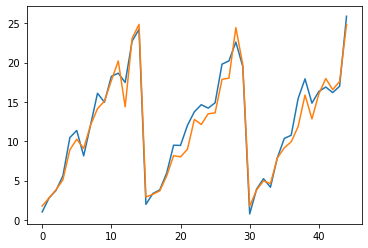

In [74]:
df_md_1['rfpi_per'].plot()
df_md_1['rfmdi_per'].plot()